In [109]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 1) Exploratory Data Analysis

In [110]:
# Read in our data
df = pd.read_csv('heart.csv')

In [111]:
# Look at the number of features and datapoints
df.shape

(303, 14)

In [112]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [113]:
# Gives us a good idea of the main features in the data
# Can review categorical vs continuous
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [114]:
# Look for missing values in our dataframe
# This dataset has no missing values
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

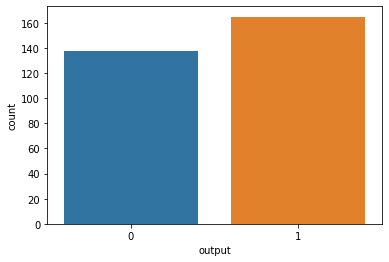

In [115]:
# View countplot of our target variable
sns.countplot(x = 'output', data = df)

# Good that the number of heart attacks vs no heart attacks is similar 
# This means the model will not be biased towards 0 or 1 

In [116]:
# View correlation between our variables
# Looking for strong positive or strong negative correlation
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


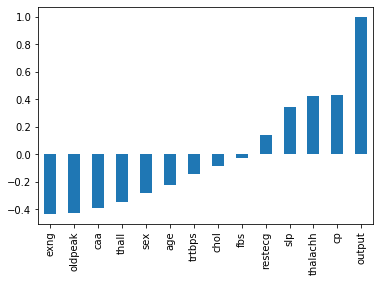

In [117]:
# Can view how our target variable correlates with other features
# df.corr()['output'].sort_values()
df.corr()['output'].sort_values().plot(kind = 'bar')

# Not huge correlation seen with any variables

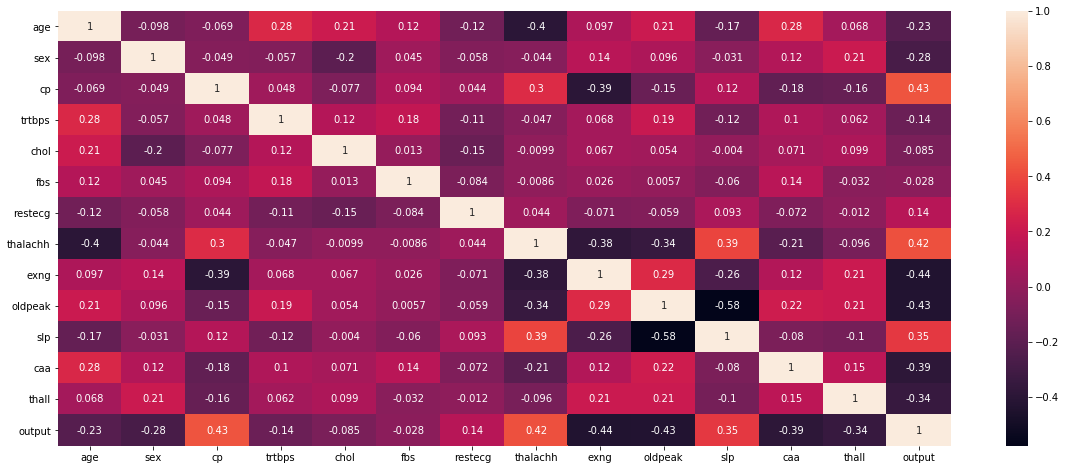

In [118]:
# View correlation between all features 
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(), annot = True)

# Can be noted that there is some correlation between output and cp, thalachh and slp

In [119]:
# Before we begin using the models, we need to pre-process the data
# There are several categorical variables within columns that we want to use 
# We do this using dummy variables

In [120]:
# 0 if theyre not, 1 if they are
# This creates a problem known as multi-colinearity however
# This means the algorithm will be able to perfectly predict another column based on what it is fed from one column 
# I.e. if this column has a 0 for no heart attack, it must be a 1 for heart attack
# The algorithm will confuse itself with this 
# We fix this problem using the 'drop first' function

In [121]:
# Seperating our categorical and continuous features
categorical_columns = ['sex','cp','fbs','restecg','exng','slp','caa','thall']
continuous_columns = ['age','trtbps','chol','thalachh','oldpeak']

# Creating a new dataframe with categorical variables converted to binary
df_feats = df
df_feats = pd.get_dummies(df_feats, columns = categorical_columns, drop_first = True)

# Defining the features and target variable for the train test split
X = df_feats.drop(['output'],axis=1).values # NumPy array format
y = df_feats['output'].values

## 2) Logistic Regression

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [124]:
# NO SCALER FOR LOG REG 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Complete our train test split leaving 20% of data for testing, as quite a small dataset

In [125]:
# Call an instance of the model
logmodel = LogisticRegression()

In [126]:
# Fit the model to our split data
logmodel.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [127]:
# Predict the 'output' feature for our features in the test dataset
predictions = logmodel.predict(X_test)

In [128]:
# Pass in our true values vs our predictions
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

           0       0.94      0.88      0.91        34
           1       0.86      0.93      0.89        27

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [ ]:
# This model has performed very well, with 90% accuracy

In [129]:
# Show our true positives/negatives vs false positives/negatives
confusion_matrix(y_test, predictions)

array([[30,  4],
       [ 2, 25]])

In [130]:
performance = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
performance
# Shows our predicted class (benign or malignant) vs the true class

,Actual,Predicted
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
56,1,1
57,0,0
58,1,1
59,0,0


## 3) Support Vector Machine

In [131]:
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVC

In [133]:
# Instantiating the scaler
scaler = RobustScaler()

# Scaling the continuous features (not the categorical features of course)
X_train = scaler.fit_transform(X_train)

In [134]:
# Scaling the continuous features in our test set also
X_test = scaler.fit_transform(X_test)

In [135]:
# Instantiating the model
model = SVC()

In [136]:
# Fit the model to our scaled data
model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [137]:
predictions = model.predict(X_test)

In [138]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83        34
           1       0.73      1.00      0.84        27

    accuracy                           0.84        61
   macro avg       0.86      0.85      0.84        61
weighted avg       0.88      0.84      0.83        61



In [139]:
print(confusion_matrix(y_test,predictions))

[[24 10]
 [ 0 27]]


In [ ]:
# This model has performed quite well still but not as well as log reg
# Several false positives were seen in the results

In [141]:
performance = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
performance

,Actual,Predicted
0,1,1
1,0,1
2,0,1
3,1,1
4,0,0
...,...,...
56,1,1
57,0,0
58,1,1
59,0,0


## 4) Neural Network

In [142]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [143]:
# Using the minmax scaler for our NN
# This will scale the data between 0 and 1
scaler = MinMaxScaler()

In [144]:
X_train = scaler.fit_transform(X_train)

In [145]:
X_test = scaler.fit_transform(X_test)

In [146]:
# We use an early stop to monitor the validation loss and stop the training at a certain point
# This point is when the val loss starts increasing, meaning we are overfitting, and we want to minimise this
# Patience = 10 means we will stop 10 epochs after an increase in val loss is seen
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [147]:
# Creating our model
model = Sequential()

# Using 14 neurons as we have 14 features
# Then halving this number in the next layer
model.add(Dense(14, activation='relu'))

model.add(Dense(7, activation='relu'))

model.add(Dense(1, activation='sigmoid')) # One final layer to decide 0 or 1 (will they have a heart attack or not)

# Sigmoid function for binary classification

model.compile(loss='binary_crossentropy', optimizer='adam')
# Binary cross entropy as this is a binary classification problem

In [148]:
model.fit(x=X_train, y=y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[early_stop])

Train on 242 samples, validate on 61 samples
Epoch 1/100
242/242 [==============================] - 1s 6ms/sample - loss: 0.6818 - val_loss: 0.6668
Epoch 2/100
242/242 [==============================] - 0s 462us/sample - loss: 0.6681 - val_loss: 0.6550
Epoch 3/100
242/242 [==============================] - 0s 427us/sample - loss: 0.6572 - val_loss: 0.6455
Epoch 4/100
242/242 [==============================] - 0s 458us/sample - loss: 0.6470 - val_loss: 0.6350
Epoch 5/100
242/242 [==============================] - 0s 432us/sample - loss: 0.6370 - val_loss: 0.6232
Epoch 6/100
242/242 [==============================] - 0s 459us/sample - loss: 0.6266 - val_loss: 0.6116
Epoch 7/100
242/242 [==============================] - 0s 429us/sample - loss: 0.6165 - val_loss: 0.5995
Epoch 8/100
242/242 [==============================] - 0s 472us/sample - loss: 0.6065 - val_loss: 0.5884
Epoch 9/100
242/242 [==============================] - 0s 459us/sample - loss: 0.5965 - val_loss: 0.5749
Epoch 10/100

In [149]:
predictions = model.predict_classes(X_test)

In [150]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      0.82      0.87        34
           1       0.81      0.93      0.86        27

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



In [151]:
print(confusion_matrix(y_test, predictions))

[[28  6]
 [ 2 25]]


In [ ]:
# The neural network has performed better than the SVM with higher accuracy
# However, the model is still falsely predicting several positives and some negatives